<a href="../01_LTI/_index.ipynb">&larr; LTI-Index </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>

# Periodizität zeitdiskreter Signale

Dieses Notebook untersucht und illustriert die Periodizität zeitdiskreter Signale (Work in Progress, Umwandlung vom Pythonfile in ein Notebook ist nicht vollständig).

In [5]:
import numpy as np
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange,
                    linspace, zeros, ones)
%matplotlib inline
import matplotlib.pyplot as plt
figsize = {"figsize":(13,5)}

import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
np.set_printoptions(precision=3)

import dsp_fpga_lib as dsp
plt.rcParams.update(dsp.mpl_rc) # define plot properties 

In [6]:
EXPORT = False # save graphics as file to local directory when True

# This Greatest Common FRACTION function also works with fractions
def gcf(a, b):
    while b != 0:
        a, b = b, a % b # a = b, then b = a % b (remainder)
    return a 
    
# Return min / max of an array a, expanded by eps*(max(a) - min(a))
def lim_eps(a,eps):
    mylim = (min(a) -(max(a) - min(a))*eps, max(a) + (max(a)-min(a))*eps)
    return mylim  

In [7]:
#Initialize variables
#------------------------------------------------
fs = 500   # sampling frequency
Ts = 1.0/fs      # sampling period
N_man  = 0     # manual selection of N if N_man > 0 

fsig = 30  # base signal frequency # pi * 50 
fsig2 = 60.0  # additional harmonic or component
DC   = 1.5    # DC-level (offset for cos-Signal)
A1   = 0.5   # Amplitude
A2   = 0.0
phi1 = 0.0 #-pi/2 + 0.01 # starting phase
phi2 = 0.0
#-------------------------------------------------
tstep = 1.0/(fsig*50) # time step for plotting "analog" signal
N = Nmax = int(fs / gcf(fs,fsig)) # Number of samples in one "digital" period
L = Lmax = int(fsig / gcf(fs,fsig)) # Number of "analog" periods
print('N =',N)
print('gcf(fs,fsig) = ', gcf(fs,fsig))
print('L =', L)
disp_L = True # highlight periodicity of analog signal if possible
if N_man > 0:
    N = N_man
    L = int(fs/fsig)
if L > 20: # Too many periods for analog plot
    L = L_per = 10
    N = int(L / (fsig * Ts))
    disp_L = 'false'
else:
   L_per = L+1  # display number of periods of analog signal

Tmax = L_per/fsig # calculate timespan from L_per
N_Ts = Tmax / Ts # number of samples in Tmax

#------------------------------------------------
# numpy.arange(start,stop,step): create linear spaced arrays (vectors)
# alternative: numpy.linspace(start,stop,numsteps,endpoint=true)      
t = np.linspace(0,Tmax,int(round(N_Ts))*50, endpoint=False) # "analog" time                            
n = np.arange(0,int(round(N_Ts)),1) # discrete number of samples
# calculate "analog" and "sampled" signal:
xt = DC + A1 * cos(2.0*pi*fsig*t + phi1) + A2 * cos(2.0*pi*fsig2*t + phi2)
xn = DC + A1 * cos(2.0*pi*fsig*n*Ts + phi1) + A2 * cos(2.0*pi*fsig2*n*Ts + phi2)

#xt = DC + A1 * sgn(cos(2.0*pi*fsig*t + phi1)) 
#xn = DC + A1 * sgn(cos(2.0*pi*fsig*n*Ts + phi1))
#xt = np.sign(xt) # rect function
#xn = np.sign(xn) # rect function

N = 50
gcf(fs,fsig) =  10
L = 3


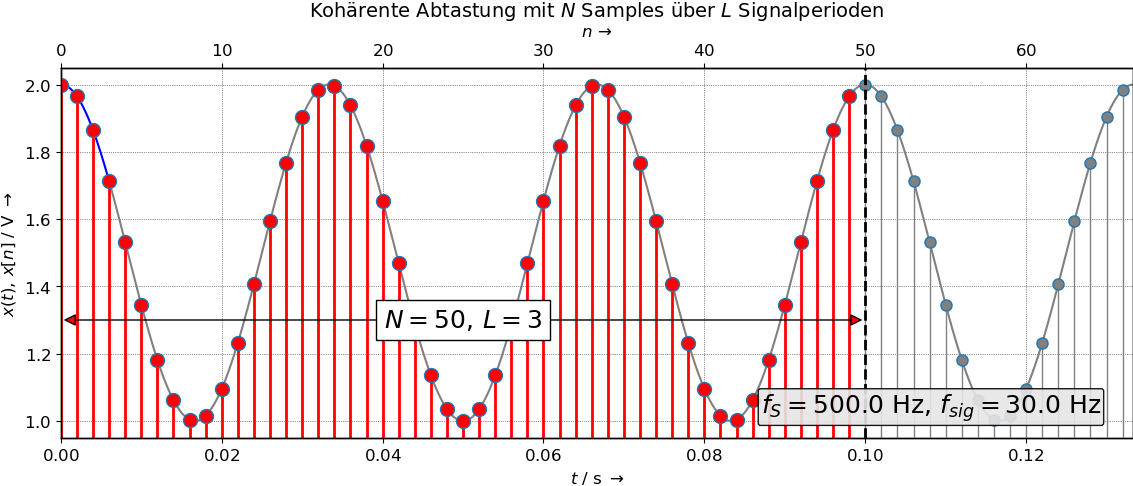

In [8]:
fig, ax1 = plt.subplots(1, **figsize) 
ax1.plot(t[0:L*50+1], xt[0:L*50+1], 'b-', label = '$x(t)$') # plot x for L periods using blue line:
ax1.plot(t[L*50:], xt[L*50:], color='grey', linestyle='-')   # plot rest of x 
ax1.set_xlabel(r'$t$ / s $\rightarrow$')
ax1.set_ylabel(r'$x(t), \, x[n]$ / V $\rightarrow$')
ax1.grid(axis='x') # plot y-gridlines for both x-axes
ax1.set_xlim([0,Tmax])
ax2 = ax1.twiny() # make two plots with same y- but different x-axes
markerline, stemlines, baseline = ax2.stem(n[0:N], xn[0:N], label = '$x[n]$') 
plt.setp(markerline, 'markerfacecolor', 'r', 'markersize', 10)
plt.setp(stemlines, 'color','r', 'linewidth', 2)
plt.setp(baseline, 'linewidth', 0) # turn off baseline
if disp_L==True:
    markerline, stemlines, baseline = ax2.stem(n[N:], xn[N:]) 
    plt.setp(markerline, 'markerfacecolor', 'grey', 'markersize', 8)
    plt.setp(stemlines, 'color','grey', 'linewidth', 1, linestyle='-')
    plt.setp(baseline, 'linewidth', 0) # turn off baseline
ax2.set_xlabel(r'$n \, \rightarrow$')
ax2.grid(True) # plot x-gridlines for second x-axis
ax2.set_xlim([0,N_Ts]) # match range for second x-axis with first one
ylbl = min(xt) + (max(xt) - min(xt)) * 0.3 # position for label
ax2.text(0.97, 0.04, '$f_S = %.1f$ Hz, $f_{sig} = %.1f$ Hz' %(fs,fsig),
         fontsize=18, ha="right", va="bottom",linespacing=1.5,
         transform = ax2.transAxes, # coordinates relativ to axis
         bbox=dict(alpha=0.9,boxstyle="round,pad=0.1", fc='0.9'))
if disp_L==True:
    # double-headed arrow for period length using annotate command with empty text:
    ax2.annotate('', (0, ylbl),(N, ylbl), xycoords='data', ha="center", va="center", size=18,
        arrowprops=dict(arrowstyle="<|-|>", facecolor = 'red', edgecolor='black' ))
        #see matplotlib.patches.ArrowStyle
    ax2.axvline(x=N, linewidth=2, color='k', linestyle='--') 
# textbox with values for N, L
ax2.text((N)/2.0,ylbl,'$N = %s, \, L = %s$' %(Nmax, Lmax), fontsize=18,ha="center",
         va="center", linespacing=1.5, bbox=dict(boxstyle="square", fc='white'))                    
ax2.set_ylim(lim_eps(xt,0.05))    # set ylim to min/max of xt
ax2.axhline() # horizontal line at y=0 from xmin to xmax (rel. coordinates)
ax2.set_title('Kohärente Abtastung mit $N$ Samples über $L$ Signalperioden')
fig.subplots_adjust(top=0.85,right=0.95)
if EXPORT:
    fig.savefig("my_file_{0:s}Hz.png".format(str(int(fs))))

***
**Copyright**

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.